In [1]:
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

In [2]:
# import the necessary libraries

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import time
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.ndimage import gaussian_filter

import warnings
warnings.filterwarnings('ignore')
# %config InlineBackend.figure_format ='retina'

%matplotlib inline

In [3]:
print("\nTBI-POS DATA\n")
df = pd.read_csv("/Users/sahajathota/Downloads/ADS/PRO/Files/ADNI/TBI-pos/103-DOD-tts_all.csv")
df.head()




TBI-POS DATA



,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294
0,11.829700,-33.356865,134.034794,6.817365,400.480468,-21.834439,-3.130131,7.037909,9.603331,16.692895,...,4.534952,24.885804,62.558130,31.285757,29.047788,23.226974,-6.882597,37.565400,1.731384,-5.462210
1,-40.680637,-66.845918,12.305370,-7.017320,86.611716,10.765649,-39.746599,-15.240641,-7.153347,-10.962085,...,17.235413,22.425989,30.027221,-15.451260,-24.847230,-5.033562,-23.692738,-3.105029,27.777644,24.709001
2,10.159264,-30.360111,10.437850,-47.633791,28.018491,46.570022,155.558208,-17.604152,-20.861342,-39.217121,...,-3.390691,17.813146,27.017888,65.253744,18.799478,1.590990,32.376914,-22.024339,69.638037,78.952727
3,-9.149101,-13.557429,-71.089584,1.205246,-64.655720,-38.438955,-39.818811,10.694767,-9.657934,1.817375,...,-16.437261,5.483302,31.102764,43.003122,-20.857081,-25.506986,25.619721,-22.339804,-64.105574,-89.577730
4,-4.829721,19.810923,-38.628274,-4.947206,-30.758762,39.098080,49.432679,4.835496,21.615302,17.770496,...,44.831303,44.567023,20.735252,9.982543,39.576203,57.782792,-6.853416,16.606539,92.094113,44.517518


In [4]:
print("\nTBI-NEG DATA\n")
df1 = pd.read_csv("/Users/sahajathota/Downloads/ADS/PRO/Files/ADNI/TBI-neg/213-DOD-tts_all.csv")
df1.head()


TBI-NEG DATA



,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294
0,31.152748,61.313047,32.301734,-17.998734,-10.702644,-96.408462,-84.482347,101.103733,-32.160989,1.349481,...,42.852030,-19.204136,-36.501247,-55.462259,-24.539167,-0.000369,-52.423226,-57.132634,-116.085723,-99.938413
1,52.551115,70.984226,51.502356,-8.078578,-33.804034,191.899107,85.689873,92.406617,28.870098,10.266241,...,-37.557472,-60.092899,-35.558787,-50.688402,-6.732879,-10.588199,-80.018592,-40.513352,140.373812,141.852658
2,4.934950,-25.132456,-58.155436,-20.308245,-10.956449,56.631841,-107.573748,27.050493,14.057155,-40.548976,...,-8.190562,38.759420,20.419315,26.706815,24.261514,8.552122,-73.220221,-43.294116,11.982526,-116.364322
3,-0.739310,32.880364,-80.302185,26.062025,23.101091,-71.155366,-109.002008,-103.144852,-2.792914,-8.013824,...,-21.264517,9.089943,-63.123164,-36.773348,7.958721,10.248704,-59.640743,-63.389803,-103.327996,-71.181246
4,11.326980,22.691476,-32.690218,1.227411,8.871752,-44.143192,-11.142797,-71.753589,18.560898,-13.361256,...,32.902557,12.232872,27.795244,10.772028,24.337452,3.009518,-1.808403,-4.883664,-30.902356,73.310419


In [5]:
print("\nHC-ALL DATA\n")
df2 = pd.read_csv("/Users/sahajathota/Downloads/ADS/PRO/Files/ADNI/HC-all/1162_tts_all.csv")
df2.head()



HC-ALL DATA



,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294
0,-16.214212,91.240368,-105.543012,-228.850812,-28.037629,-92.003104,-12.533931,-54.610648,-7.862704,-4.426300,...,22.654844,-4.510680,25.445093,69.402807,-24.971795,-5.922293,47.086847,12.833221,-58.435224,-46.905594
1,5.166873,79.216126,-77.528157,-14.566772,-79.044681,-49.088846,37.208047,58.087431,-33.825845,-10.641713,...,-24.487994,-52.474253,13.932154,-25.267083,-13.117441,-33.376322,41.158600,-9.570335,-54.052364,-52.291556
2,25.895338,36.068711,-20.203927,45.568658,-38.881800,-34.798385,-96.820039,12.256303,6.201957,-1.966580,...,13.052579,113.584693,-8.557807,-38.075636,6.405066,4.575603,3.685585,4.635768,-60.116989,-39.493742
3,-42.351793,-107.629222,9.293506,-7.828062,9.554105,94.170138,-55.323706,20.543582,0.371147,-2.913220,...,-42.617723,-45.055545,-182.144711,-218.178752,7.844148,25.143785,-94.044646,-47.640839,80.430423,-7.816805
4,-13.234017,42.055982,-75.999437,-16.025662,-74.999374,-49.168725,10.014857,6.038798,29.782758,1.463621,...,-20.674257,-69.855946,-3.281701,-62.301353,4.727313,20.051570,23.227194,-55.800970,16.234753,6.932712


In [6]:
print("\nDemographics DATA\n")
df3 = pd.read_excel("/Users/sahajathota/Downloads/ADS/PRO/Files/ADNI/demographics-all.xlsx")
df3.head()


Demographics DATA



,subject,scan-number,HC-AUD-match,subject-group,Study,Diagnosis,Age,age-subject-group,Sex,AUDIT-Total,MMSE
0,002_S_4171,1,NaN,AD-MCI,ADNI,MCI,69.0,elderly,M,NaN,24.0
1,002_S_4229,1,NaN,AD-MCI,ADNI,MCI,66.0,elderly,M,NaN,29.0
2,002_S_4473,1,NaN,AD-MCI,ADNI,MCI,75.0,elderly,M,NaN,27.0
3,002_S_4521,1,NaN,AD-MCI,ADNI,MCI,70.0,elderly,M,NaN,27.0
4,002_S_4799,1,NaN,AD-MCI,ADNI,MCI,68.0,elderly,M,NaN,29.0


In [7]:
print("\nTBI-POS DATA SHAPE\n", df.shape)
print("\nTBI-NEG DATA SHAPE\n", df1.shape)
print("\nHC-ALL DATA SHAPE\n", df2.shape) 
print("\nDemographics DATA SHAPE\n", df3.shape)


TBI-POS DATA SHAPE
 (375, 294)

TBI-NEG DATA SHAPE
 (375, 294)

HC-ALL DATA SHAPE
 (375, 294)

Demographics DATA SHAPE
 (315, 11)


In [8]:
print("\nTBI-POS DATA QUICK SUMMARY\n", df.describe())
print("\nTBI-NEG DATA QUICK SUMMARY\n", df1.describe())
print("\nHC-ALL DATA QUICK SUMMARY\n", df2.describe())
print("\nDemographics QUICK SUMMARY\n", df3.describe())


TBI-POS DATA QUICK SUMMARY
              s001        s002        s003        s004        s005        s006  \
count  375.000000  375.000000  375.000000  375.000000  375.000000  375.000000   
mean    -0.036135   -0.235800    0.107159   -0.080093    0.402808   -0.081492   
std     14.441993   20.974308   33.110745   15.234933   42.103465   32.154569   
min    -41.033453  -97.933412 -106.612754  -47.633791 -160.562419  -92.707170   
25%     -8.207723  -12.906625  -21.593382   -9.728326  -22.074620  -20.512884   
50%     -0.465653   -0.457077   -0.139869    0.554246   -0.871044   -2.395114   
75%      8.354686   13.042204   20.489223    8.947034   18.603537   21.059023   
max     52.923133  104.090269  134.034794   50.593867  400.480468  108.889539   

             s007        s008        s009        s010  ...        s285  \
count  375.000000  375.000000  375.000000  375.000000  ...  375.000000   
mean     0.010545   -0.028824   -0.031482    0.009441  ...   -0.036216   
std     58.628607  

In [9]:
print("\nTBI-POS DATA INFO\n")
df.info()
print("\nTBI-NEG DATA INFO\n")
df1.info()
print("\nHC-ALL DATA INFO\n")
df2.info()
print("\nDemographics DATA INFO\n")
df3.info()


TBI-POS DATA INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Columns: 294 entries, s001 to s294
dtypes: float64(294)
memory usage: 861.5 KB

TBI-NEG DATA INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Columns: 294 entries, s001 to s294
dtypes: float64(294)
memory usage: 861.5 KB

HC-ALL DATA INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Columns: 294 entries, s001 to s294
dtypes: float64(294)
memory usage: 861.5 KB

Demographics DATA INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject            315 non-null    object 
 1   scan-number        315 non-null    int64  
 2   HC-AUD-match       54 non-null     float64
 3   subject-group      315 non-null    object 
 4   Study              315 non-null    object 
 5   Diagnosis        

In [10]:
# Print column names for TBI-POS data
print("\nTBI-POS DATA COLUMNS\n")
print(df.columns)

# Print column names for TBI-NEG data
print("\nTBI-NEG DATA COLUMNS\n")
print(df1.columns)

# Print column names for HC-ALL data
print("\nHC-ALL DATA COLUMNS\n")
print(df2.columns) 

# Print column names for Demographics data
print("\nDemographics DATA COLUMNS\n")
print(df3.columns)


TBI-POS DATA COLUMNS

Index(['s001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009',
       's010',
       ...
       's285', 's286', 's287', 's288', 's289', 's290', 's291', 's292', 's293',
       's294'],
      dtype='object', length=294)

TBI-NEG DATA COLUMNS

Index(['s001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009',
       's010',
       ...
       's285', 's286', 's287', 's288', 's289', 's290', 's291', 's292', 's293',
       's294'],
      dtype='object', length=294)

HC-ALL DATA COLUMNS

Index(['s001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009',
       's010',
       ...
       's285', 's286', 's287', 's288', 's289', 's290', 's291', 's292', 's293',
       's294'],
      dtype='object', length=294)

Demographics DATA COLUMNS

Index(['subject', 'scan-number', 'HC-AUD-match', 'subject-group', 'Study',
       'Diagnosis', 'Age', 'age-subject-group', 'Sex', 'AUDIT-Total', 'MMSE'],
      dtype='object')


In [11]:
N = pd.isnull(df).sum()
print("\nTBI-POS DATA DataFrame Displaying (NaN) value = \n",N)
N1 = pd.isnull(df1).sum()
print("\nDataTBI-NEG DATA Frame Displaying (NaN) value = \n",N1)
N2 = pd.isnull(df2).sum()
print("\nHCI-ALL DataFrame Displaying DATA (NaN) value = \n",N2)
N3 = pd.isnull(df3).sum()
print("\nDemographics DataFrame Displaying DATA (NaN) value = \n",N3)


TBI-POS DATA DataFrame Displaying (NaN) value = 
 s001    0
s002    0
s003    0
s004    0
s005    0
       ..
s290    0
s291    0
s292    0
s293    0
s294    0
Length: 294, dtype: int64

DataTBI-NEG DATA Frame Displaying (NaN) value = 
 s001    0
s002    0
s003    0
s004    0
s005    0
       ..
s290    0
s291    0
s292    0
s293    0
s294    0
Length: 294, dtype: int64

HCI-ALL DataFrame Displaying DATA (NaN) value = 
 s001    0
s002    0
s003    0
s004    0
s005    0
       ..
s290    0
s291    0
s292    0
s293    0
s294    0
Length: 294, dtype: int64

Demographics DataFrame Displaying DATA (NaN) value = 
 subject                0
scan-number            0
HC-AUD-match         261
subject-group          0
Study                  0
Diagnosis              0
Age                    2
age-subject-group      2
Sex                    0
AUDIT-Total          287
MMSE                 264
dtype: int64


In [12]:
#finding the rows where age, and age-subject-group are zero
df3[df3['Age'].isnull() & df3['age-subject-group'].isnull()]


,subject,scan-number,HC-AUD-match,subject-group,Study,Diagnosis,Age,age-subject-group,Sex,AUDIT-Total,MMSE
193,1132R1,1,NaN,HC,IAM,HC,NaN,NaN,F,NaN,NaN
314,1132R2,2,NaN,HC,IAM,HC,NaN,NaN,F,NaN,NaN


In [13]:
#Dropping The Rows That Having age, age-subject-group As zero
df3 = df3.drop(labels=[193,314], axis=0)

In [14]:
#Replacing All Leftover NAN Values With Zero.
df3=df3.replace(np.nan, 0)
N3 = pd.isnull(df3).sum()
print("\nDemographics DataFrame Displaying DATA (NaN) value = \n",N3)



Demographics DataFrame Displaying DATA (NaN) value = 
 subject              0
scan-number          0
HC-AUD-match         0
subject-group        0
Study                0
Diagnosis            0
Age                  0
age-subject-group    0
Sex                  0
AUDIT-Total          0
MMSE                 0
dtype: int64


In [15]:
df3.dtypes

subject               object
scan-number            int64
HC-AUD-match         float64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
AUDIT-Total          float64
MMSE                 float64
dtype: object

In [16]:
#Changing the data types
df3.loc[:, 'HC-AUD-match'] = df3.loc[:, 'HC-AUD-match'].astype(int)
df3.loc[:, 'Age'] = df3.loc[:, 'Age'].astype(int)
df3.loc[:, 'AUDIT-Total'] = df3.loc[:, 'AUDIT-Total'].astype(int)

In [17]:
#Data types changed 
df3.dtypes

subject               object
scan-number            int64
HC-AUD-match           int64
subject-group         object
Study                 object
Diagnosis             object
Age                    int64
age-subject-group     object
Sex                   object
AUDIT-Total            int64
MMSE                 float64
dtype: object

In [18]:
# Apply Gaussian smoothing to TBI-POS with a standard deviation of 1.0
df_smoothed = pd.DataFrame(gaussian_filter(df, sigma=1.0))

# Apply Gaussian smoothing to TBI-NEG with a standard deviation of 1.0
df1_smoothed = pd.DataFrame(gaussian_filter(df1, sigma=1.0))

# Apply Gaussian smoothing to HCI-ALL with a standard deviation of 1.0
df2_smoothed = pd.DataFrame(gaussian_filter(df2, sigma=1.0))

# Print the original data and the smoothed data of TBI-POS
print("Original Data for TBI-POS:")
print(df)
print("Smoothed Data for TBI-POS:")
print(df_smoothed)

# Print the original data and the smoothed data TBI-NEG
print("Original Data for TBI-NEG:")
print(df1)
print("Smoothed Data for TBI-NEG:")
print(df1_smoothed)

# Print the original data and the smoothed data HC-ALL
print("Original Data for HC-ALL:")
print(df2)
print("Smoothed Data for HC-ALL:")
print(df2_smoothed)

Original Data for TBI-POS:
          s001       s002        s003       s004        s005       s006  \
0    11.829700 -33.356865  134.034794   6.817365  400.480468 -21.834439   
1   -40.680637 -66.845918   12.305370  -7.017320   86.611716  10.765649   
2    10.159264 -30.360111   10.437850 -47.633791   28.018491  46.570022   
3    -9.149101 -13.557429  -71.089584   1.205246  -64.655720 -38.438955   
4    -4.829721  19.810923  -38.628274  -4.947206  -30.758762  39.098080   
..         ...        ...         ...        ...         ...        ...   
370  -2.300323  -2.938328  -62.881879  -5.976364    9.767095 -11.757787   
371  15.946486   1.806663  -26.889260  -1.785564  -28.591425 -33.869631   
372  -7.437991 -12.435105  -18.213083  -7.166550    6.708493 -14.091763   
373  -5.370281 -15.403688    1.915306  -8.737577   -6.147835 -55.325978   
374  -6.244955 -30.071870    9.270620 -22.459412   19.032090 -19.507479   

           s007       s008       s009       s010  ...       s285       s

In [19]:
# Calculate the correlation matrix
corr_matrix = df_smoothed.corr()

# Print the correlation matrix
print("Correlation Matrix for TBI-POS:")
print(corr_matrix)

# Print the highest and lowest correlations
max_corr = corr_matrix.max().max()
min_corr = corr_matrix.min().min()
print(f"Highest correlation for TBI-POS: {max_corr:.2f}")
print(f"Lowest correlation for TBI-POS: {min_corr:.2f}")

# Calculate the correlation matrix for TBI-NEG
corr_matrix_tbi_neg = df1_smoothed.corr()

# Print the correlation matrix for TBI-NEG
print("\nCorrelation Matrix for TBI-NEG:")
print(corr_matrix_tbi_neg)

# Print the highest and lowest correlations for TBI-NEG
max_corr_tbi_neg = corr_matrix_tbi_neg.max().max()
min_corr_tbi_neg = corr_matrix_tbi_neg.min().min()
print(f"Highest correlation for TBI-NEG: {max_corr_tbi_neg:.2f}")
print(f"Lowest correlation for TBI-NEG: {min_corr_tbi_neg:.2f}")

# Calculate the correlation matrix for HC-ALL
corr_matrix_hc_all = df2_smoothed.corr()

# Print the correlation matrix for HC-ALL
print("\nCorrelation Matrix for HC-ALL:")
print(corr_matrix_hc_all)

# Print the highest and lowest correlations for HC-ALL
max_corr_hc_all = corr_matrix_hc_all.max().max()
min_corr_hc_all = corr_matrix_hc_all.min().min()
print(f"Highest correlation for HC-ALL: {max_corr_hc_all:.2f}")
print(f"Lowest correlation for HC-ALL: {min_corr_hc_all:.2f}")




Correlation Matrix for TBI-POS:
          0         1         2         3         4         5         6    \
0    1.000000  0.914418  0.655350  0.416865  0.303866  0.425061  0.480247   
1    0.914418  1.000000  0.897195  0.699713  0.548147  0.579190  0.546980   
2    0.655350  0.897195  1.000000  0.921802  0.779912  0.687782  0.541578   
3    0.416865  0.699713  0.921802  1.000000  0.939566  0.752863  0.514409   
4    0.303866  0.548147  0.779912  0.939566  1.000000  0.866772  0.614705   
..        ...       ...       ...       ...       ...       ...       ...   
289  0.548299  0.617494  0.605616  0.521288  0.483368  0.530633  0.475543   
290  0.555840  0.633611  0.623580  0.536228  0.504776  0.570633  0.514898   
291  0.596034  0.665723  0.642063  0.561827  0.564833  0.677454  0.622978   
292  0.592333  0.644642  0.603515  0.530527  0.570356  0.748825  0.725659   
293  0.554681  0.600062  0.553410  0.482918  0.532317  0.746452  0.761915   

          7         8         9    ...     

Highest correlation for HC-ALL: 1.00
Lowest correlation for HC-ALL: -0.68



PLOT FOR TBI-POS


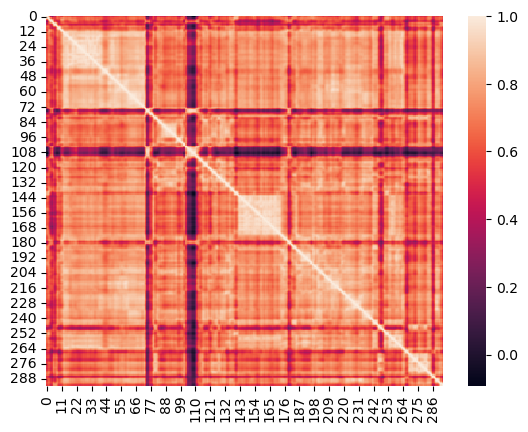


PLOT FOR TBI-NEG


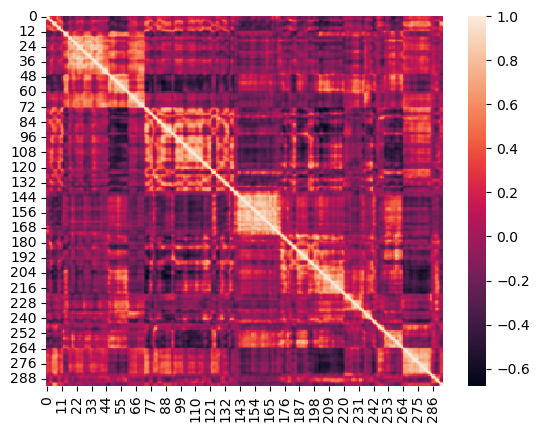


PLOT FOR HC-ALL


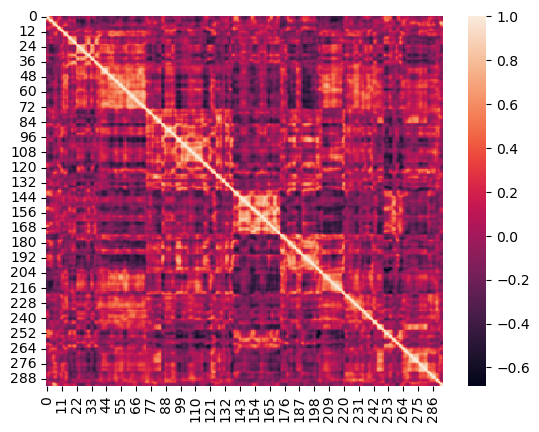

In [20]:
sb.heatmap(corr_matrix)
# Show the plot for TBI-POS
print("\nPLOT FOR TBI-POS")
plt.show()

sb.heatmap(corr_matrix_tbi_neg)
# Show the plot for TBI-POS
print("\nPLOT FOR TBI-NEG")
plt.show()

sb.heatmap(corr_matrix_hc_all)
# Show the plot for TBI-POS
print("\nPLOT FOR HC-ALL")
plt.show()